In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv("data/for_app.csv",sep=',', encoding='latin-1')
df=data.copy()
df.head()

,fiyat,ekran_boyutu,islemci_cekirdek_sayisi,islemci_hizi,disk_tipi,ram_tipi,gpu_model,parmak_izi_okuyucu,isletim_sistemi,ekran_cozunurluk,ram_miktari,gpu_miktari,disk_kapasitesi,hdmi,marka
0,32499,17.3,14,3.5,SSD,DDR4,Paylasimsiz,Yok,Freedos,1920 x 1080,32,6,1024,Var,Monster
1,29498,16.1,14,3.5,SSD,DDR5,Paylasimsiz,Yok,Freedos,1920 x 1080,16,6,1024,Var,HP
2,25899,17.3,8,2.3,SSD,DDR4,Paylasimsiz,Yok,Freedos,1920 x 1080,16,6,500,Var,Monster
3,21219,16.1,12,3.3,SSD,DDR5,Paylasimsiz,Yok,Freedos,1920 x 1080,16,4,512,Var,HP
4,11999,15.6,4,2.4,SSD,DDR4,Paylasimsiz,Yok,Freedos,1920 x 1080,8,2,512,Var,Acer


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 332
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fiyat                    332 non-null    int64  
 1   ekran_boyutu             332 non-null    float64
 2   islemci_cekirdek_sayisi  332 non-null    int64  
 3   islemci_hizi             332 non-null    float64
 4   disk_tipi                332 non-null    object 
 5   ram_tipi                 332 non-null    object 
 6   gpu_model                332 non-null    object 
 7   parmak_izi_okuyucu       332 non-null    object 
 8   isletim_sistemi          332 non-null    object 
 9   ekran_cozunurluk         332 non-null    object 
 10  ram_miktari              332 non-null    int64  
 11  gpu_miktari              332 non-null    int64  
 12  disk_kapasitesi          332 non-null    int64  
 13  hdmi                     332 non-null    object 
 14  marka                    3

In [22]:
df.shape

(332, 15)

In [23]:
columns=df.columns
columns

Index(['fiyat', 'ekran_boyutu', 'islemci_cekirdek_sayisi', 'islemci_hizi',
       'disk_tipi', 'ram_tipi', 'gpu_model', 'parmak_izi_okuyucu',
       'isletim_sistemi', 'ekran_cozunurluk', 'ram_miktari', 'gpu_miktari',
       'disk_kapasitesi', 'hdmi', 'marka'],
      dtype='object')

In [24]:
df.columns.str.strip()

Index(['fiyat', 'ekran_boyutu', 'islemci_cekirdek_sayisi', 'islemci_hizi',
       'disk_tipi', 'ram_tipi', 'gpu_model', 'parmak_izi_okuyucu',
       'isletim_sistemi', 'ekran_cozunurluk', 'ram_miktari', 'gpu_miktari',
       'disk_kapasitesi', 'hdmi', 'marka'],
      dtype='object')

## Numerical-categorical

In [25]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['disk_tipi', 'ram_tipi', 'gpu_model', 'parmak_izi_okuyucu',
        'isletim_sistemi', 'ekran_cozunurluk', 'hdmi', 'marka'],
       dtype='object'),
 Index(['fiyat', 'ekran_boyutu', 'islemci_cekirdek_sayisi', 'islemci_hizi',
        'ram_miktari', 'gpu_miktari', 'disk_kapasitesi'],
       dtype='object'))

In [26]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col fiyat is : [ 32499  29498  25899  21219  11999  18699  19549  24499  25526  31399
  24949  11359  19999  23899  15899  18334  19779  15149  24699  20199
  18799  31199  22449  27699  19009  20249  16299  17949  21399  20939
  16895  18239  25999  18349  25698  11699  19289  23599  19974  18999
  22099  16549  22749  28688  21229  12999  29299  13412  20399  24299
  13669  30719  23279  32037  22999  20377  31699  19299  21669  16061
  32630  20069  16114  20499  46599  19685  25958  18099  28670  12829
  13299  22582  12399  17989  28899  25799  25399  17658  17189  19928
  38334  20457  18399  18141  16829  40999  17755  13881  13699  18749
  16599  68699  20405  23489  16850  21711  22699  27687  72374  22639
  18720  40855  18185  27437  18570  21999  22104  26953  18191  17299
  18380  34128  16736  15999  16307  19774  20999  24993  40418  22194
   9953  17890  25997  26016  23641  25262  19007  19847  21393  18140
  13673  20264  37538  17997  18850 

##############################################################################

so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

# Exploratory Data Analysis

c:\Users\cinar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fiyat', ylabel='Density'>

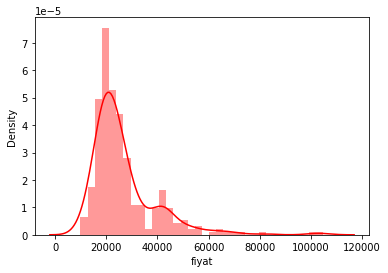

In [27]:
# viewing the distribution of the price column

sns.distplot(df['fiyat'],color='red')

c:\Users\cinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\cinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\cinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\cinar\anaconda3\lib\si

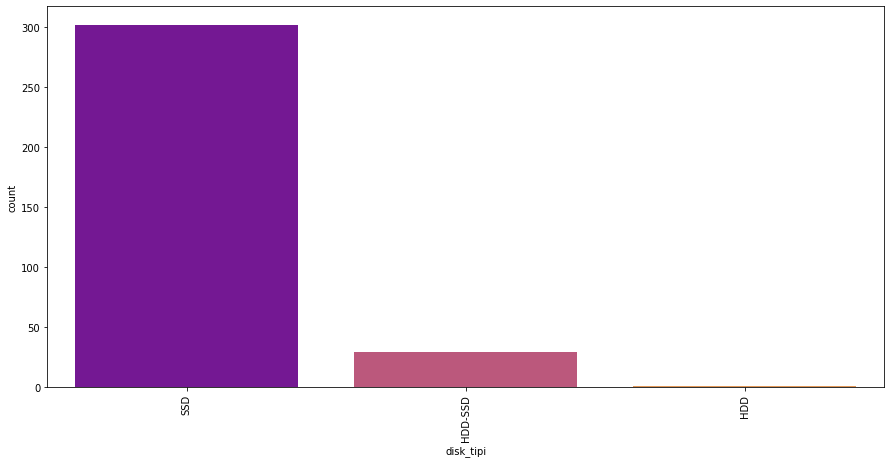

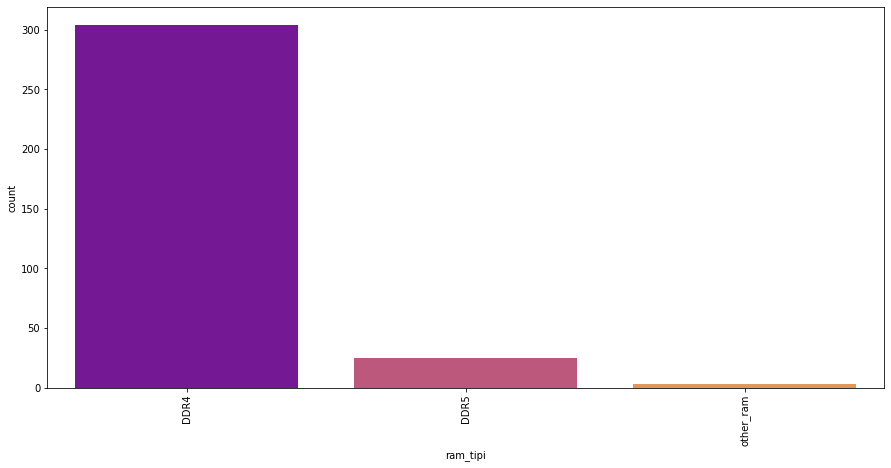

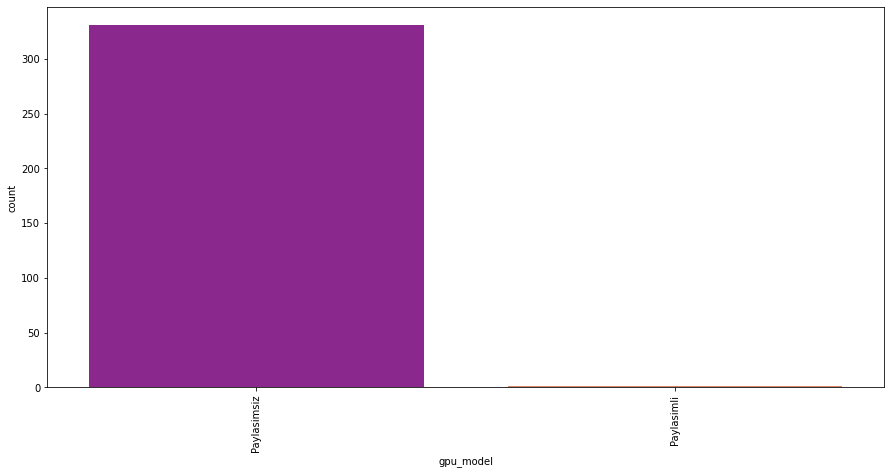

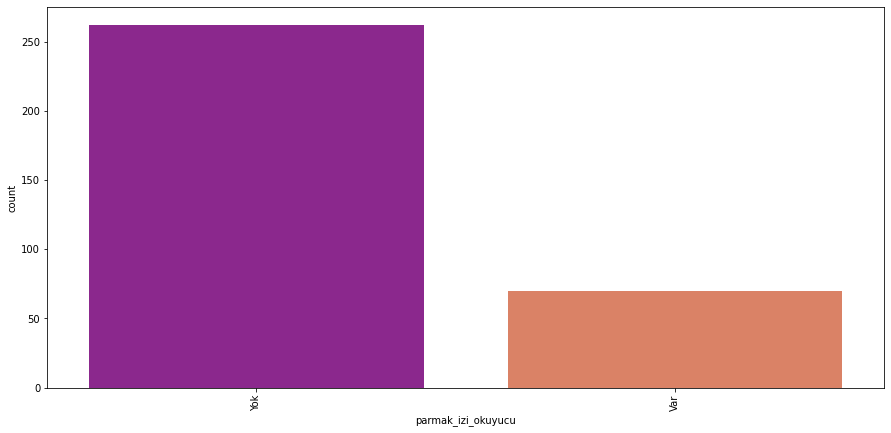

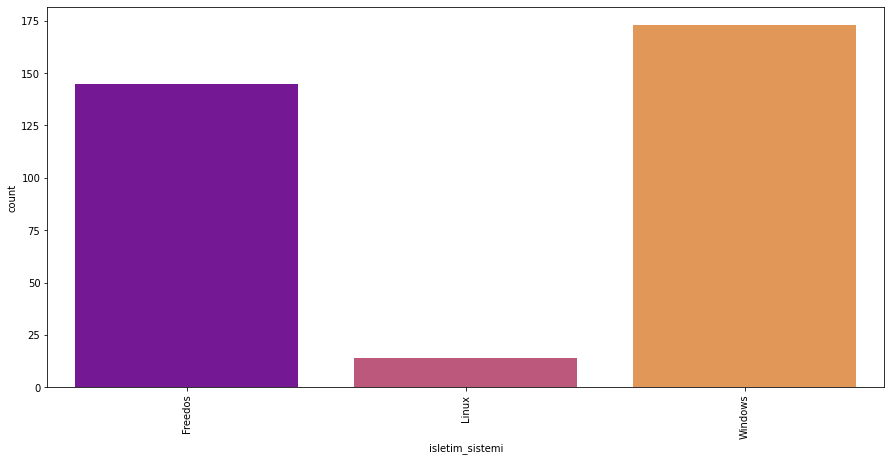

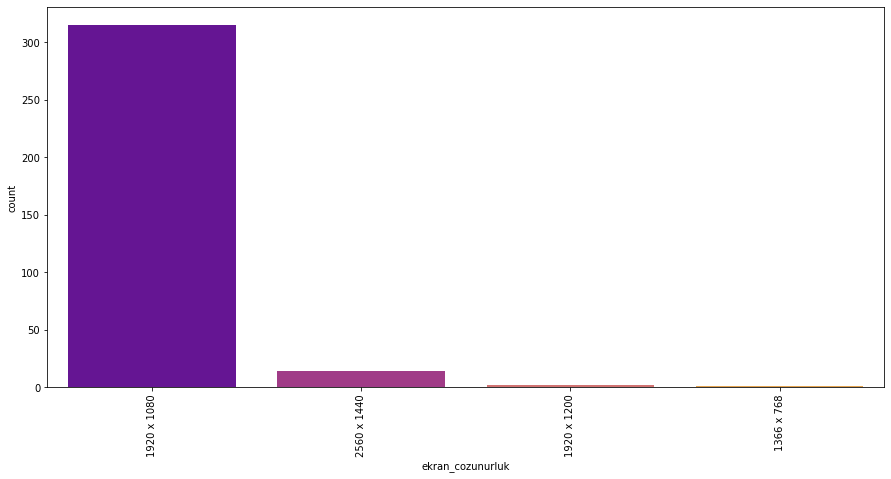

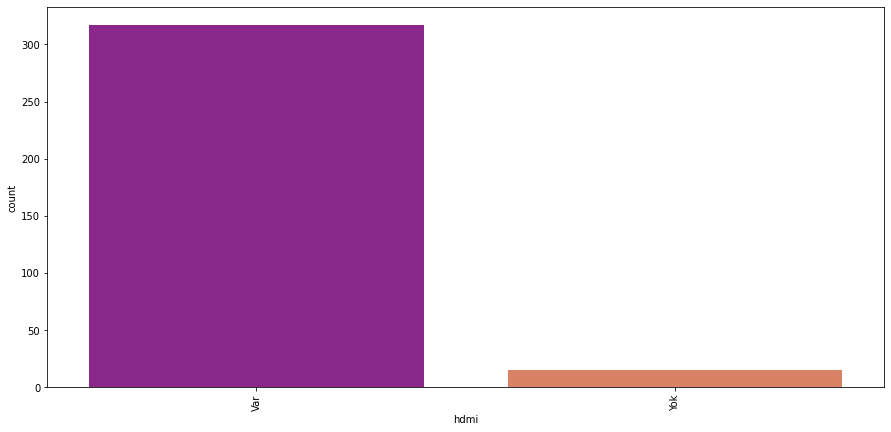

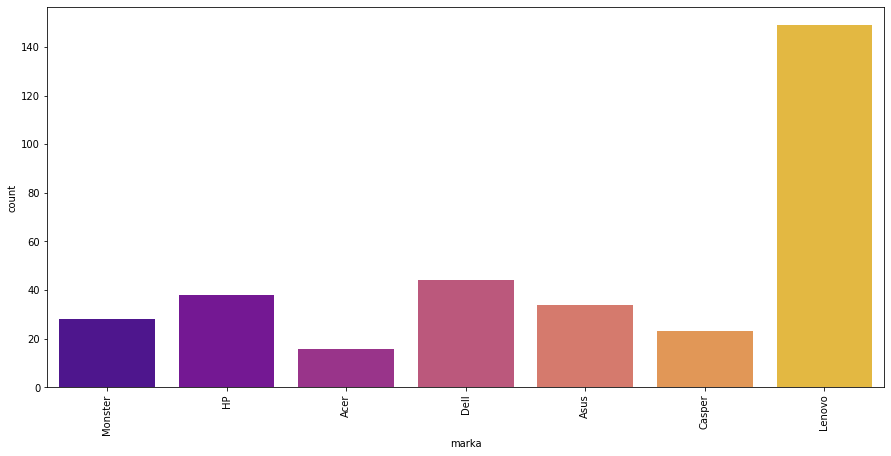

In [29]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in catvars:
    drawplot(col)

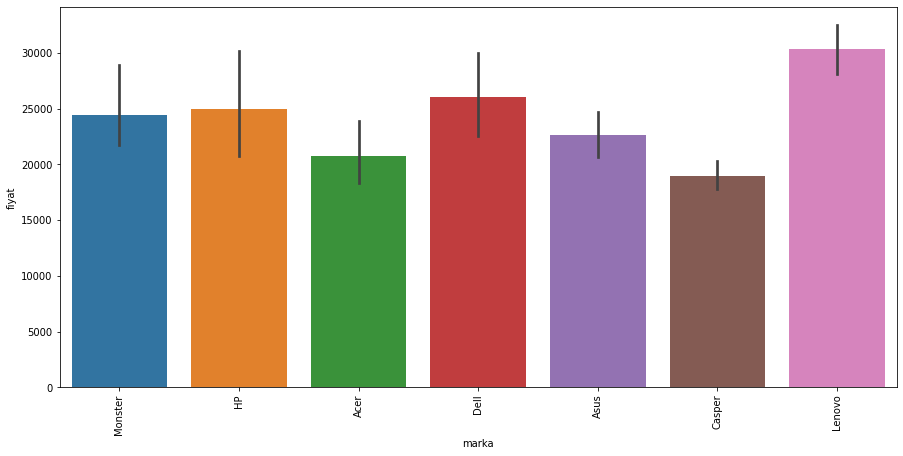

In [30]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sns.barplot(x = df['marka'],y = df['fiyat'])
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:xlabel='ekran_boyutu', ylabel='fiyat'>

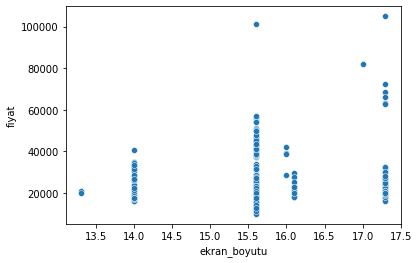

In [31]:
# variation of inches towards the price

sns.scatterplot(x = df['ekran_boyutu'],y = df['fiyat'])

In [32]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

KeyError: 'ScreenResolution'

In [ ]:
sns.countplot(df['parmak_izi_okuyucu'],palette='plasma')

In [ ]:
sns.barplot(x = df['parmak_izi_okuyucu'],y = df['fiyat'])
plt.xticks(rotation = 'vertical')

### Extracting the X Resolution and the Y Resolution

 we will split the text at the "x" letter and seperate the 2 parts
 from this we can observe that one of the col is Y res we need to do
 some feature engineering on the X res col

splitdf = df['ekran_cozunurluk'].str.split('x',n = 1,expand=True)
splitdf.head()

splitdf = df['ekran_cozunurluk'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]

'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it,but the problem is the numbers are scattered 
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.? 
all the numbers which come after an number and \d+ the string must end with number


'''


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()


c:\Users\cinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram_miktari', ylabel='count'>

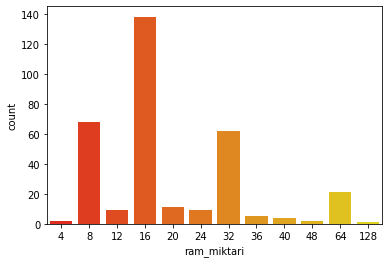

In [33]:
sns.countplot(df['ram_miktari'],palette='autumn')

c:\Users\cinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram_miktari', ylabel='fiyat'>

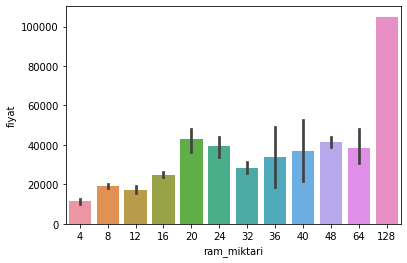

In [34]:
sns.barplot(df['ram_miktari'],df['fiyat'])

c:\Users\cinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gpu_miktari', ylabel='fiyat'>

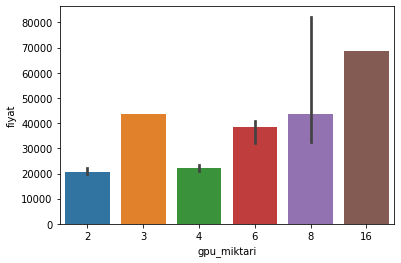

In [35]:
sns.barplot(df['gpu_miktari'],df['fiyat'],estimator=np.median)

In [ ]:
sns.barplot(df['isletim_sistemi'],df['fiyat'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x:setcategory(x))

df.head()

In [ ]:
sns.countplot(df['isletim_sistemi'],palette='plasma')

# Missing Values

In [ ]:
df.isnull().sum()

### Bluetooth-renk-isim-optik sürücü

In [ ]:
df.bluetooth.value_counts()
df.bluetooth.unique()

df.renk.value_counts()
df.renk.unique()

df.isim.value_counts()
df.isim.unique()

df.optik_surucu.value_counts()
df.optik_surucu.unique()
"""
optik surucu 1000 taneden sadece 10unda var yaklaşık olarak,
bluetooth tüm cihazlarda oldugu için belirli bi etkisi olmayacaktır.
renk ve isim içinde aynı durum geçerli bu yuzden bu 4lüyü dropluyorum
"""
set_4=["bluetooth","renk","isim","optik_surucu"]
df.drop(set_4,axis=1,inplace=True)
df.drop("islemci",axis=1,inplace=True)


In [ ]:
df.info()

## USB

In [ ]:
df.usb.value_counts()
df.usb.unique()
df.usb.isnull().sum()
df.usb.fillna("Var",inplace=True)
df.usb.value_counts()
df.usb.isnull().sum()
""" 
usb si olmayan bilgisayarmı olur ?
"""
df.drop("usb",axis=1,inplace=True)

## İslemci_cekirdek_sayaısı

In [ ]:
df.islemci_cekirdek_sayisi.value_counts()
df.islemci_cekirdek_sayisi.fillna(4.0,inplace=True)
df.islemci_cekirdek_sayisi.value_counts()
df['islemci_cekirdek_sayisi'] = df['islemci_cekirdek_sayisi'].astype(int)
df.islemci_cekirdek_sayisi.isnull().sum()

## Ram tipi

In [ ]:
df.ram_tipi.unique()
df.ram_tipi.fillna("DDR4",inplace=True)
df.ram_tipi.value_counts()
df['ram_tipi'] = df['ram_tipi'].apply(lambda x: str(x).replace('DDR3', "other_ram"))
df['ram_tipi'] = df['ram_tipi'].apply(lambda x: str(x).replace('LPDDR4', "other_ram"))
df['ram_tipi'] = df['ram_tipi'].apply(lambda x: str(x).replace('LPDDR4X', "other_ram"))
df['ram_tipi'] = df['ram_tipi'].apply(lambda x: str(x).replace('LPDDR5', "other_ram"))
df['ram_tipi'] = df['ram_tipi'].apply(lambda x: str(x).replace('other_ramX', "other_ram"))
df.ram_tipi.value_counts()

In [ ]:

df.info()

"""
for column in df.columns:
    df[column] = df[column].replace('1 TB',1024)
    df[column] = df[column].replace('1 TB + 512',1536)
    df[column] = df[column].replace('1 TB + 256',1280)
    df[column] = df[column].replace('2 TB',2048)
    df[column] = df[column].replace('2 TB + 512',2560)
    df[column] = df[column].replace('1 TB + 1 TB',2048)
    df[column] = df[column].replace('1 TB + 2 TB',3072)
    df[column] = df[column].replace('2 TB + 1 TB',3072)
    df[column] = df[column].replace('1 TB + 500',1524)
    df[column] = df[column].replace('2 TB + 2 TB',4096)
    """

## Gpu model

In [ ]:
df.gpu_model.value_counts()
df["gpu_model"]=df.gpu_model.map({"Paylaþýmsýz":"Paylasimsiz","Paylaþýmlý":"Paylasimli"})
df.gpu_model.fillna("Paylasimli",inplace=True)
df.gpu_model.value_counts()

## Ekran cözünürlük

In [ ]:
df.ekran_cozunurluk.unique()
df.ekran_cozunurluk.value_counts()
df.ekran_cozunurluk.fillna("1920 x 1080",inplace=True)

In [ ]:
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 3840 x 2160', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 2160 x 1440', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 1920 x 1280', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 2880 x 1800', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 1600 x 900', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 3024 x 1964', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 2560 x 1600', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace('nan', "random_cznrlk"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 1920 x 1080', "1920 x 1080"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 1366 x 768', "1366 x 768"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 1920 x 1200', "1920 x 1200"))
df['ekran_cozunurluk'] = df['ekran_cozunurluk'].apply(lambda x: str(x).replace(' 2560 x 1440', "2560 x 1440"))

## İşlemci Hızı

In [ ]:
df.islemci_hizi.value_counts()
df.islemci_hizi.fillna(2.80,inplace=True)

## Hdmi

In [ ]:
df.hdmi.value_counts()
df.hdmi.isnull().sum()
df.hdmi.fillna("Yok",inplace=True)

In [ ]:
df.info()

## Parmak izi Okuyucu

In [ ]:
df.parmak_izi_okuyucu.value_counts()
df.parmak_izi_okuyucu.unique()
df.parmak_izi_okuyucu.fillna("Yok",inplace=True)
df.parmak_izi_okuyucu.isnull().sum()

## Disk Tipi

In [ ]:
df.disk_tipi.value_counts()
df['disk_tipi'] = df['disk_tipi'].apply(lambda x: str(x).replace('HDD - SSD', "HDD-SSD"))

## İsletim Sistemi

In [ ]:
df.isletim_sistemi.value_counts()
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Diðer', "Linux"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows 7', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows 10', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows Pro', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows Home', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows 11 Pro', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows 11 Home', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Windows 10 Home', "Windows"))
df['isletim_sistemi'] = df['isletim_sistemi'].apply(lambda x: str(x).replace('Ubuntu', "Linux"))
df.isletim_sistemi.unique()

## İslemci modeli

In [ ]:
df.drop("islemci_modeli",axis=1,inplace=True)
"""islemcı modelini dropluyorum"""

## Disk Kapasitesi

In [ ]:
for column in df.columns:
    df[column] = df[column].replace('1 TB',1024)
    df[column] = df[column].replace('1 TB + 512',1536)
    df[column] = df[column].replace('1 TB + 256',1280)
    df[column] = df[column].replace('2 TB',2048)
    df[column] = df[column].replace('2 TB + 512',2560)
    df[column] = df[column].replace('1 TB + 1 TB',2048)
    df[column] = df[column].replace('1 TB + 2 TB',3072)
    df[column] = df[column].replace('2 TB + 1 TB',3072)
    df[column] = df[column].replace('1 TB + 500',1524)
    df[column] = df[column].replace('2 TB + 2 TB',4096)
    df[column] = df[column].replace('2 TB + 256',2304)
    df[column] = df[column].replace('1 TB + 250',1274)
    df[column] = df[column].replace('512  + 32',542)
    df[column] = df[column].replace('1 TB + 240',1264)
    df[column] = df[column].replace('1 TB + 128',1152)
    df[column] = df[column].replace('32',32)
    df[column] = df[column].replace('1524',1524)

In [ ]:
df.disk_kapasitesi.value_counts()

In [ ]:

df.info()

In [ ]:
df.head()

## Gpu miktarı

In [ ]:
subset=["gpu_model","gpu_miktari","fiyat"]
df2=df.loc[:,subset]

In [ ]:
df2.head(10)

In [ ]:
df2.loc[(df.fiyat>20000)]

In [ ]:
df2.loc[(df.fiyat>20000) & (df.gpu_model=="Paylasimli")]



In [ ]:
df2.loc[(df2.fiyat>20000) & (df2.gpu_model=="Paylasimli")]

In [ ]:
df2.loc[(df2.fiyat>20000) & (df2.gpu_model=="Paylasimsiz")]

In [ ]:
df.info()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.to_csv("remastered_last.csv")